<a href="https://colab.research.google.com/github/abinash5811/Book-Recommendation-System/blob/main/Book_Recommendation_system(ML)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path=("/content/drive/MyDrive/ml data/Copy of Users.csv")
users=pd.read_csv(file_path)
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
file_path=('/content/drive/MyDrive/ml data/Copy of Ratings.csv')
ratings=pd.read_csv(file_path)
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
file_path=("/content/drive/MyDrive/ml data/Copy of Books.csv")
books=pd.read_csv(file_path)
books.head()

<ipython-input-73-5802a1fd4f0f>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv(file_path)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
def missing_values(df):
    m_val=df.isnull().sum()
    m_val_percentage=round(df.isnull().mean().mul(100),2)
    mv_table=pd.concat([m_val,m_val_percentage],axis=1)
    mv_table=mv_table.rename(
        columns={df.index.name:"column_name",0:"missing_values", 1:'% of total values'}
    )
    mv_table['Data_type']=df.dtypes
    mv_table=mv_table.sort_values('% of total values',ascending=False)
    return mv_table.reset_index()


In [ ]:
missing_values(users)

,index,missing_values,% of total values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [ ]:
missing_values(ratings)

,index,missing_values,% of total values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64


In [ ]:
missing_values(books)

,index,missing_values,% of total values,Data_type
0,ISBN,0,0.0,object
1,Book-Title,0,0.0,object
2,Book-Author,1,0.0,object
3,Year-Of-Publication,0,0.0,object
4,Publisher,2,0.0,object
5,Image-URL-S,0,0.0,object
6,Image-URL-M,0,0.0,object
7,Image-URL-L,3,0.0,object


In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

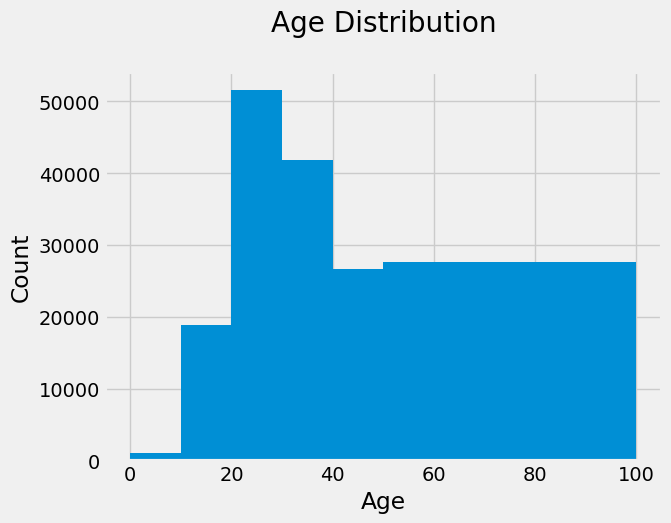

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

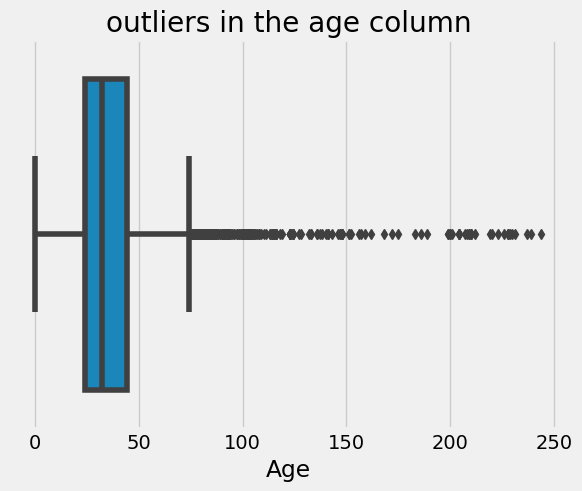

In [ ]:
sns.boxplot(x=users['Age'])
plt.title('Box Plot of Age\n')
plt.xlabel('Age')
plt.title("outliers in the age column")
plt.show()


In [ ]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
users.Location.nunique()

57339

In [ ]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
users.Country.nunique()

529

In [ ]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [ ]:
users.head(5)

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom


In [ ]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [ ]:
users['Country']=users['Country'].astype('str')

In [ ]:
cntry=list(users.Country.unique())
cntry=set(cntry)
cntry=list(cntry)
cntry= [x for x in cntry if x is not None]
cntry.sort()
print(cntry)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [ ]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

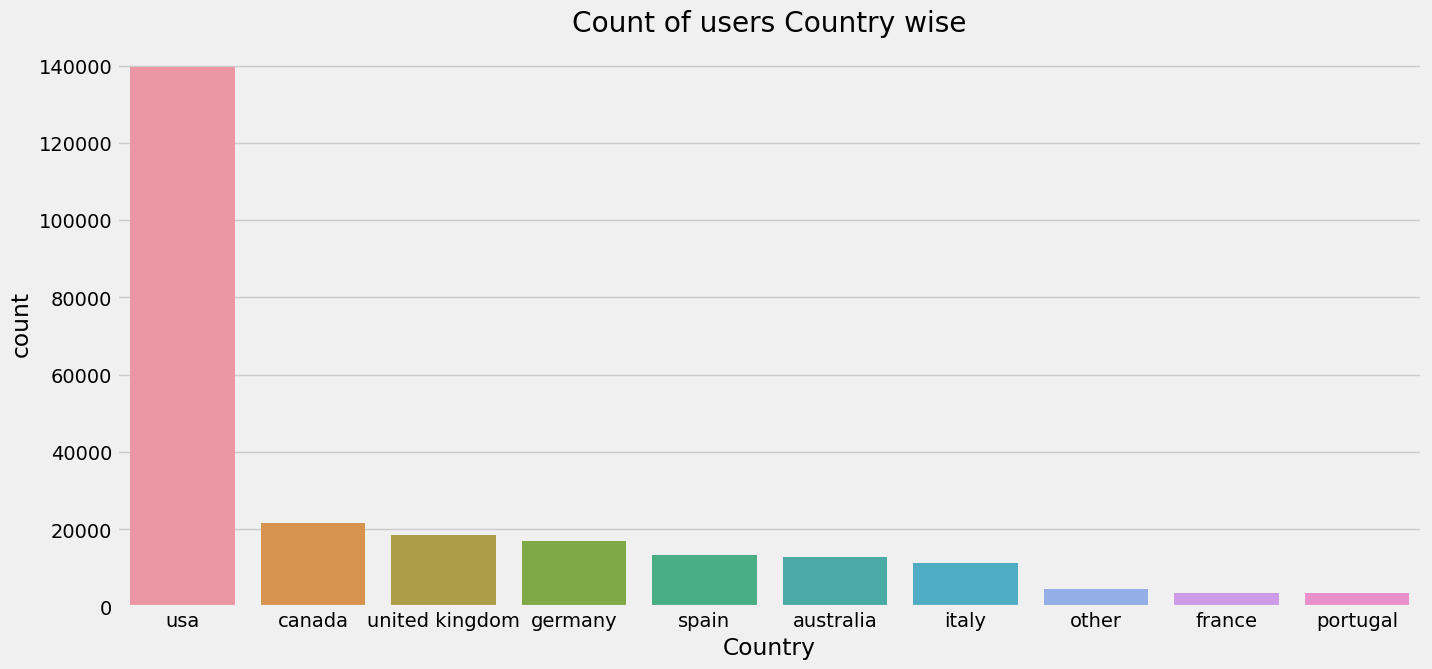

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

<ipython-input-94-82014c8e32d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


Text(0.5, 1.0, 'Age Distribution Plot')

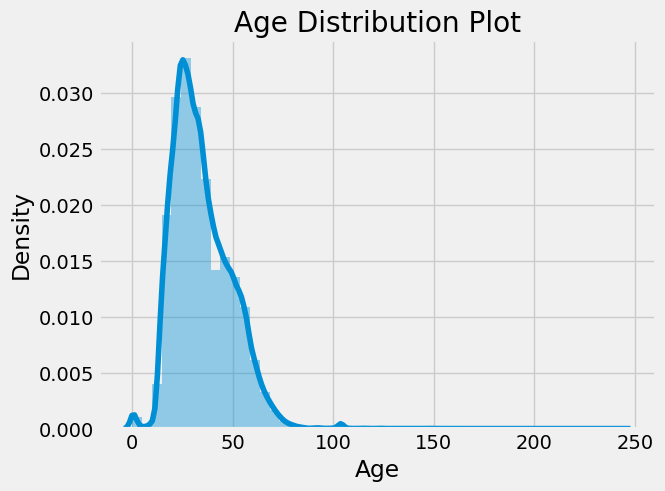

In [ ]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

In [ ]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [ ]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

In [ ]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

In [ ]:
users['Age'].fillna(users.Age.mean(),inplace=True)
users.isnull().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [ ]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.shape

(271360, 8)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books.dropna(inplace=True)

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Text(0.5, 1.0, 'Top 10 Authors')

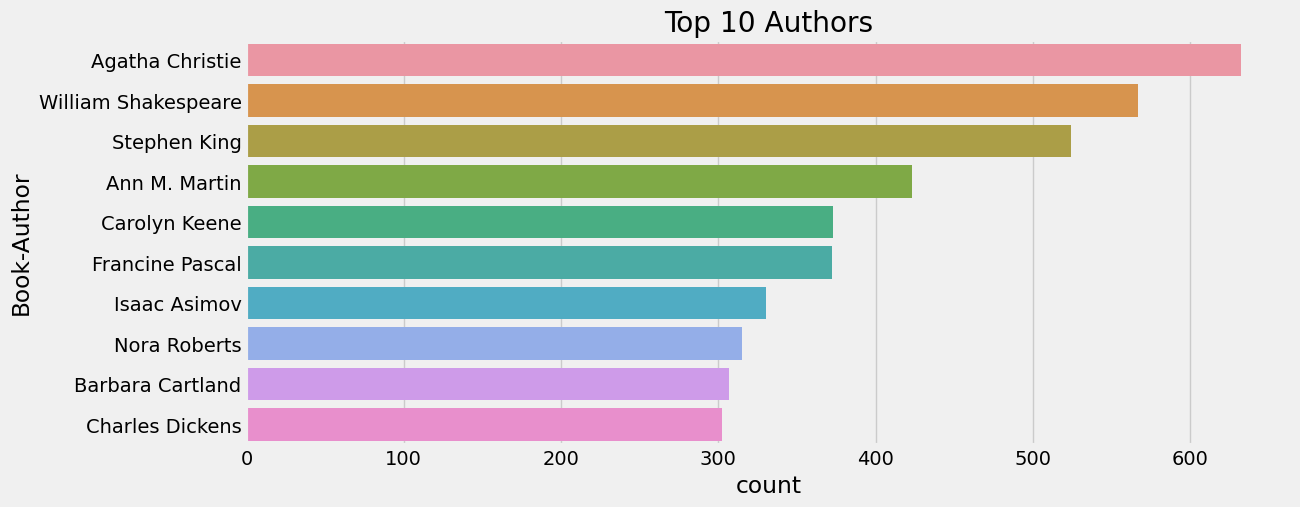

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

Text(0.5, 1.0, 'Top 10 Publishers')

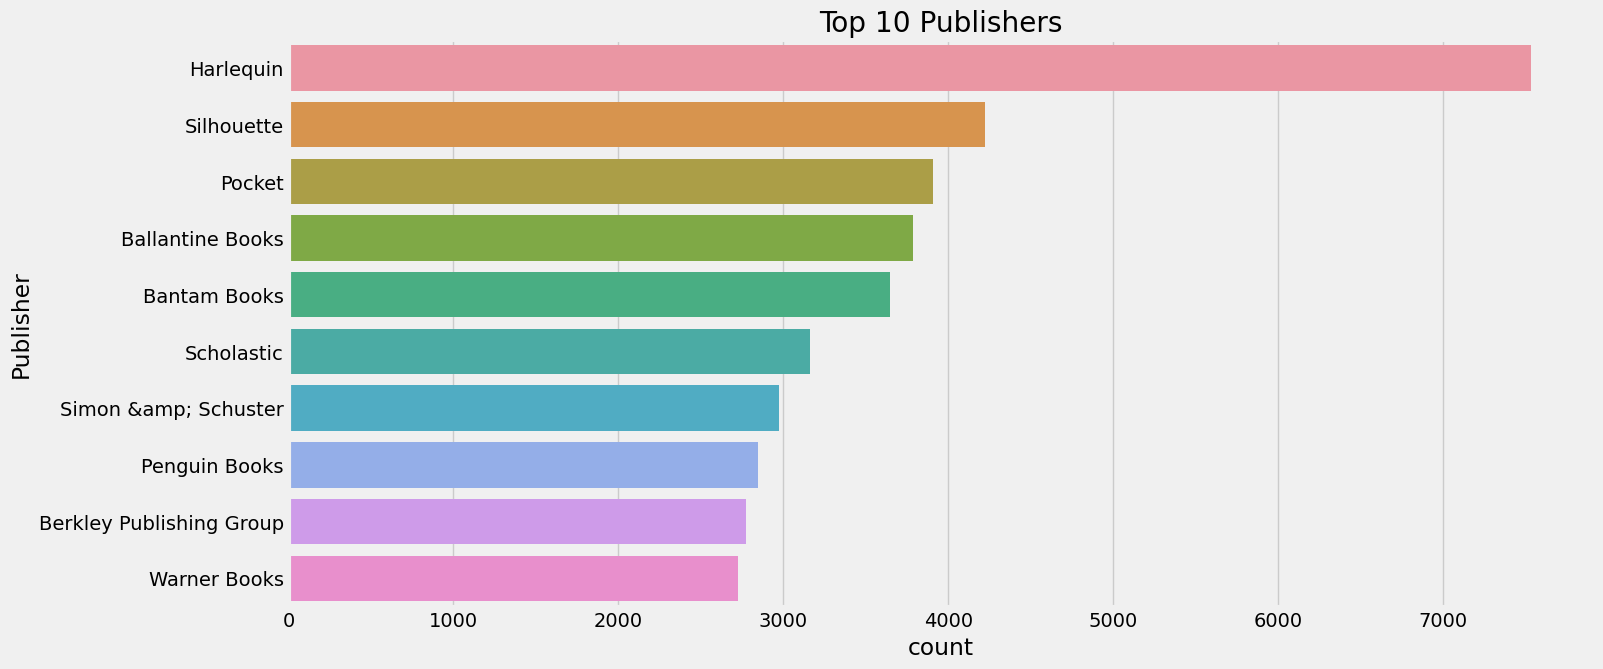

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [ ]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050']


In [ ]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031129, 3))

In [ ]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031129, 3)
shape of dataset after dropping (1031129, 3)


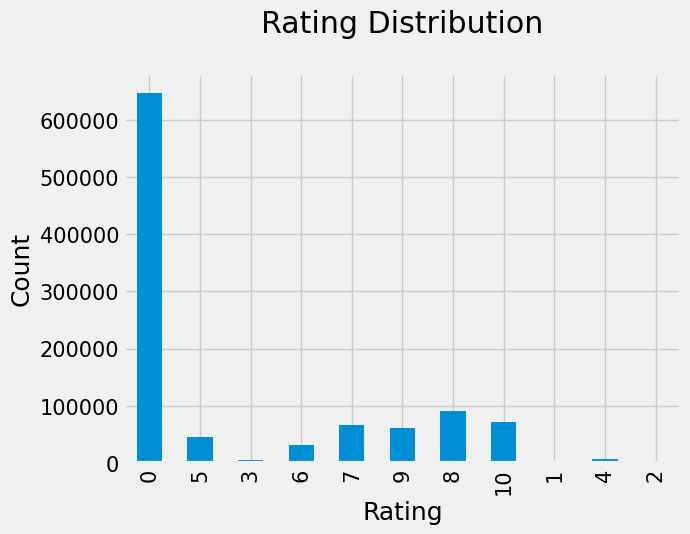

In [ ]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383838, 3)
ratings_implicit dataset (647291, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

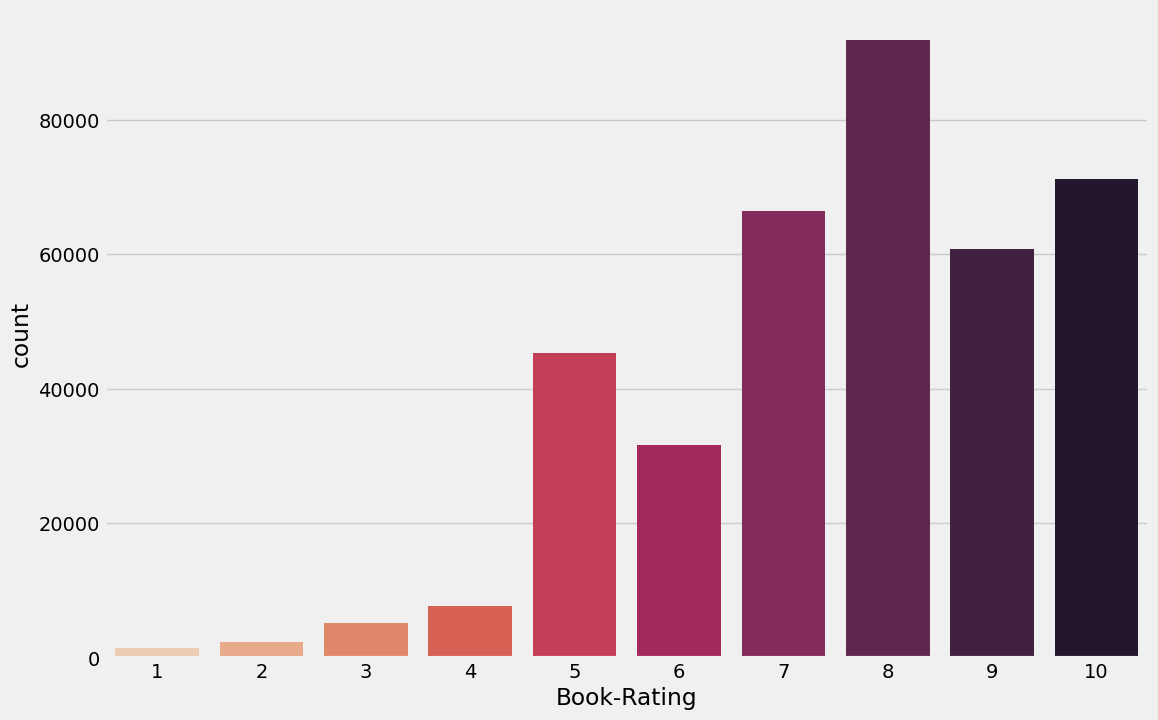

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

In [ ]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [ ]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


In [ ]:
# Create column Rating average
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

<ipython-input-127-b1db818a501c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
<ipython-input-127-b1db818a501c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')


In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [ ]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [ ]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [ ]:
missing_values(Final_Dataset)

,index,missing_values,% of total values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


In [ ]:
Final_Dataset.shape

(383838, 11)

In [ ]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626694074062495 , m=64.0


(38570, 11)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

<ipython-input-134-4266689afb61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741833
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716468
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700402
3,To Kill a Mockingbird,214,8.943925,8.640678
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609687
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596514
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595651
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508789
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490547
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484781


In [ ]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [ ]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

<ipython-input-137-89ff5b540008>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)


In [ ]:
user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327267


In [ ]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163750 sha256=9f403adfe6b5f4900c1f1a5fdec92e8e96b9bd198c1be512e80892282f4ce14f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.603754
test_mae     1.240295
fit_time     3.101688
test_time    0.647734
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.624896
test_mae     2.243077
fit_time     7.131225
test_time    0.465030
dtype: float64

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5969930673531196
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
7066,275994,0446611212,7.0,7.708487,False,8.0,0.708487
12051,61038,0375504613,5.0,6.256185,False,6.0,1.256185
8290,79003,0886777712,10.0,7.963662,False,8.0,2.036338
14388,96448,0671529439,7.0,7.305939,False,7.0,0.305939
18158,36965,0553290320,7.0,7.692717,False,8.0,0.692717


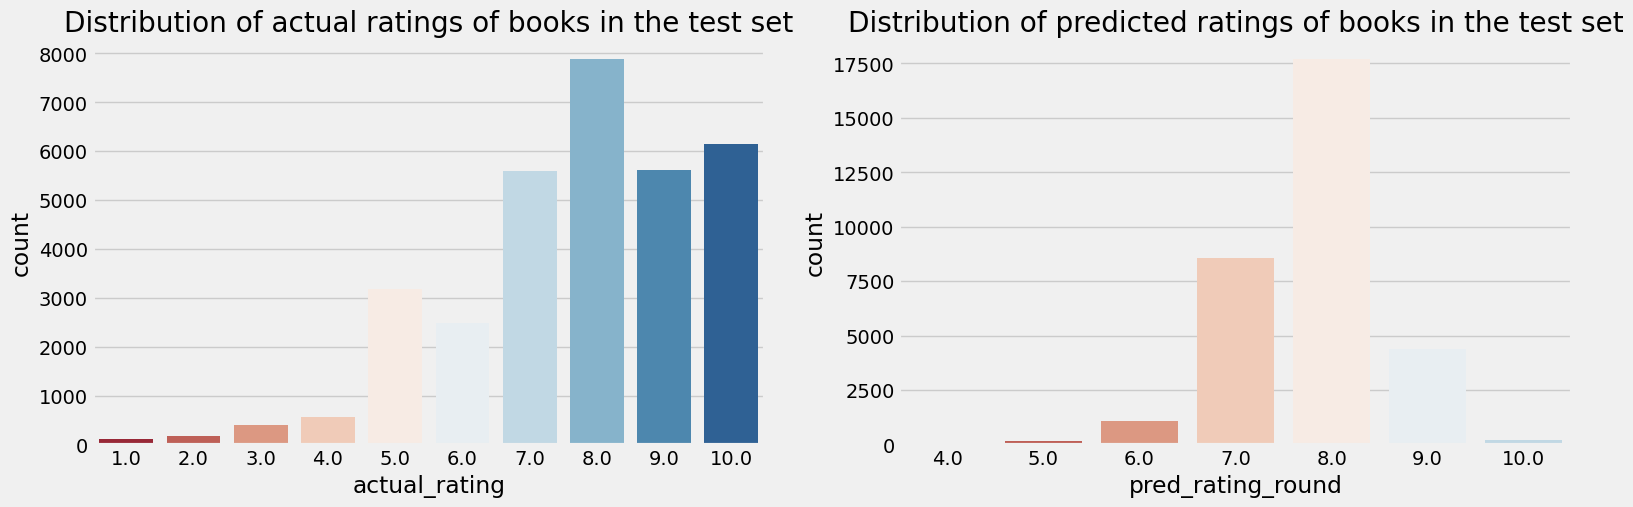

In [ ]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

<ipython-input-149-b0b975907744>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)


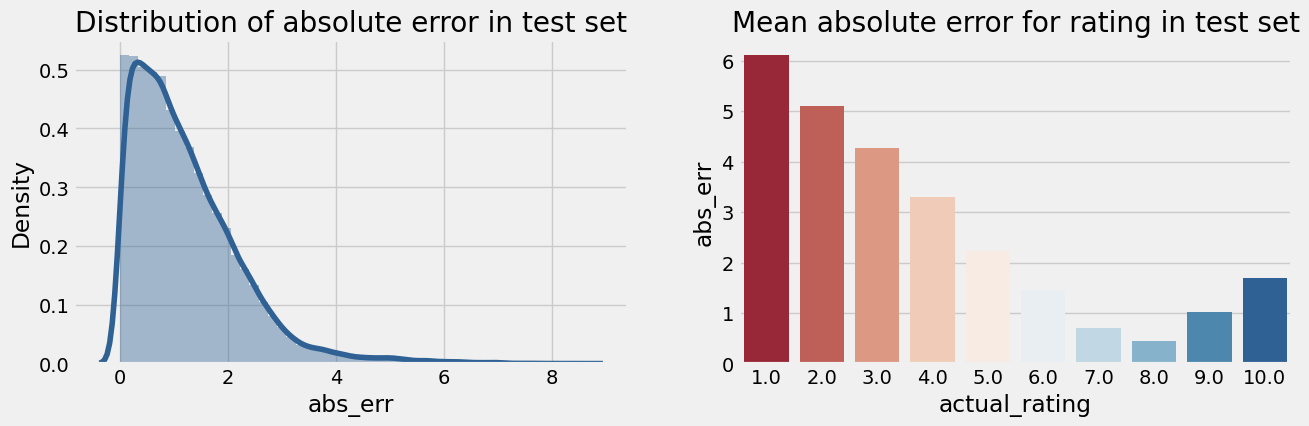

In [ ]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

In [ ]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

In [ ]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113522,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN
113554,193458,0671880314,9,8.305556,36,Schindler's List,NaN
113512,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
113518,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),NaN
113531,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,NaN
113519,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
113514,193458,0064471063,9,8.518519,27,The Horse and His Boy,NaN
113551,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
113536,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),NaN
113517,193458,0064471098,9,8.733333,15,The Silver Chair,NaN


In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113524,193458,0142001740,9,8.452769,307,The Secret Life of Bees,8.445774
113515,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),8.375989
113521,193458,0140421998,7,7.750000,4,Leaves of Grass (Penguin Classics),8.347020
113542,193458,0446611808,5,7.820000,50,Envy,8.184228
113528,193458,0316781010,7,7.809524,42,Fortune's Rocks: A Novel,7.930110


In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113515,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),8.375989
113520,193458,0140298479,9,7.539823,113,Bridget Jones: The Edge of Reason,7.863986
113524,193458,0142001740,9,8.452769,307,The Secret Life of Bees,8.445774
113523,193458,0140620206,8,7.416667,12,Tess of the Durbervilles,7.637915
113537,193458,0385474016,8,7.440678,59,Like Water for Chocolate: A Novel in Monthly I...,7.664829


In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [ ]:
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [ ]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [ ]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(18570, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,0006480764,000648302X,0006485200,000649840X,0006546684,0006547834,...,9074336329,9129622425,9500723549,9500723832,950491036X,9580464162,958704049X,9681500555,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18570 13740


In [ ]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [ ]:
ratings_matrix.head(5)

ISBN,0002005018,0002251760,0002558122,0003300277,0006480764,000648302X,0006485200,000649840X,0006546684,0006547834,...,9074336329,9129622425,9500723549,9500723832,950491036X,9580464162,958704049X,9681500555,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [ ]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [ ]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [ ]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [ ]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [ ]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241066.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


In [ ]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [ ]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [ ]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Peachtree Road:

1: Cloud Nine, with distance of 0.8263652840349331:
2: Sights Unseen, with distance of 0.84977169054757:
3: After All These Years, with distance of 0.8507115908397808:
4: Hill Towns, with distance of 0.8863808824838332:
5: Iced, with distance of 0.8884848177644084:


In [ ]:
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [ ]:
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [ ]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

In [ ]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [ ]:
corr_coffey_hands  = corr[coffey_hands]

In [ ]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

In [ ]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

<ipython-input-187-26201160e238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)


In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [ ]:

users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [ ]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383838
# of interactions from users with at least 5 interactions: 103269


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


In [ ]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103269


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


In [ ]:
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'],
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82615
# interactions on Test set: 20654


In [ ]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
60270,0573614636,76499,3.459
10696,0231076258,63714,3.459
58754,0553569910,241666,3.000
93039,1551668017,11676,2.000
90651,0929141814,177458,3.322


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(449, 55738)

In [ ]:
U.shape

(449, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 55738)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 1.40538194e-02,  2.18631019e-03,  2.58704918e-03, ...,
         2.45854963e-04,  5.80269232e-04,  1.38309554e-02],
       [-7.15073463e-04, -8.82591011e-04, -1.04436523e-03, ...,
         8.87652801e-05,  1.84563146e-04,  4.38063934e-03],
       [-2.02515370e-03, -1.73356715e-03, -2.05132075e-03, ...,
         1.78345007e-04,  4.04222274e-04,  7.32484372e-03],
       ...,
       [ 4.20660647e-03,  1.96645675e-03,  2.32689777e-03, ...,
         2.49712510e-04,  4.73030727e-04,  8.35573641e-03],
       [ 1.13676087e-02, -2.21447453e-03, -2.62037589e-03, ...,
         3.41062452e-04,  6.59116605e-04,  1.16812271e-02],
       [-1.44761187e-03,  5.13994957e-03,  6.08207489e-03, ...,
         8.58442103e-05,  1.46905746e-04,  2.89566166e-03]])

In [ ]:
all_user_predicted_ratings.shape

(449, 55738)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.014,-0.001,-0.002,0.001,-0.002,-0.004,-0.003,0.007,0.001,0.013,...,0.001,0.003,-0.002,0.007,-0.012,0.001,0.008,0.004,0.011,-0.001
000104687X,0.002,-0.001,-0.002,0.017,-0.001,0.008,0.014,0.007,-0.003,0.016,...,-0.002,0.013,-0.001,0.014,-0.005,-0.006,0.008,0.002,-0.002,0.005
0001047213,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
0001047973,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.004,...,0.001,0.002,0.003,0.001,0.002,0.002,0.002,0.001,0.001,0.000


In [ ]:
len(cf_preds_df.columns)

449

In [ ]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company


In [ ]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):

        person_metrics = self.evaluate_model_for_user(model, userid)
        return

model_recommender = ModelRecommender()

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

In [ ]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  30511
Recommendation for User-ID =  30511
         ISBN                                         Book-Title  recStrength
0  0316666343                          The Lovely Bones: A Novel        0.138
1  0446310786                              To Kill a Mockingbird        0.101
2  0345361792                            A Prayer for Owen Meany        0.101
3  0345370775                                      Jurassic Park        0.100
4  0312966970             Four To Score (A Stephanie Plum Novel)        0.078
5  0440211727                                     A Time to Kill        0.077
6  0671003755  She's Come Undone (Oprah's Book Club (Paperback))        0.076
7  0440214041                                  The Pelican Brief        0.073
8  0316769487                             The Catcher in the Rye        0.072
9  0553572997                                       The Alienist        0.072


**Conclusion**

In the exploratory data analysis (EDA), it was evident that the top-rated books were primarily novels, such as "The Lovely Bones" and "The Secret Life of Bees," indicating a strong preference for fiction among readers.

The age distribution of readers leaned towards the 20-35 age bracket, and a significant number of readers hailed from North American and European countries, including the USA, Canada, UK, Germany, and Spain.

Examining the ratings distribution revealed that the majority of books received high ratings, with most books scoring 8. Books with ratings below 5 were notably scarce.

Authors with the most prolific presence in the dataset were Agatha Christie, William Shakespeare, and Stephen King.

In terms of collaborative filtering models, the Singular Value Decomposition (SVD) technique outperformed Non-negative Matrix Factorization (NMF) with a lower Mean Absolute Error (MAE). Within memory-based approaches, item-item collaborative filtering exhibited better performance than user-user collaborative filtering, attributed to its lower computational demands.

**My git hub link**


https://github.com/abinash5811/My_first_Capstone_projectt.git